In [318]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [319]:
df = pd.read_csv ('tourism_with_id 2.csv')
df

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753


PREPROCESS

In [320]:
#cek dimensi data
df.shape

(437, 11)

In [321]:
#cek informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 37.7+ KB


In [322]:
# Menghapus kolom Place_Id karena tidak memuat informasi penting
df = df.drop(['Place_Id'], axis=1)
df

,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
...,...,...,...,...,...,...,...,...,...,...
432,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906
433,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822
434,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938
435,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753


In [323]:
df.isnull().any()

Place_Name      False
Description     False
Category        False
City            False
Price           False
Rating          False
Time_Minutes     True
Coordinate      False
Lat             False
Long            False
dtype: bool

In [324]:
df.isnull().sum()

Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
dtype: int64

In [325]:
df = df.drop(['Time_Minutes'], axis=1)
df

,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
0,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
...,...,...,...,...,...,...,...,...,...
432,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906
433,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822
434,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938
435,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753


In [326]:
df.isnull().sum()

Place_Name     0
Description    0
Category       0
City           0
Price          0
Rating         0
Coordinate     0
Lat            0
Long           0
dtype: int64

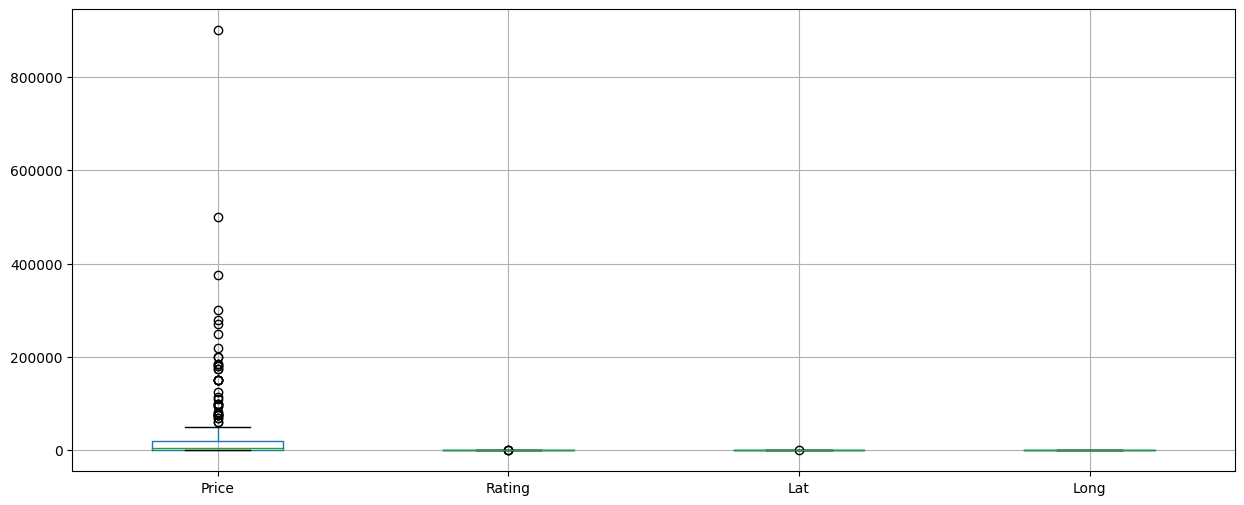

In [327]:
#deteksi outlier dengan boxplot
fig, ax = plt.subplots(figsize=(15, 6))
df.boxplot()
plt.show()

In [328]:
#Price
#deteksi dgn IQR value

Q1 = np.percentile(df['Price'],25, interpolation ='midpoint')
Q3 = np.percentile(df['Price'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

#above upper bound
upper = Q3+1.5*IQR
upper_array1 = np.array(df['Price']>=upper)

#Below Lower bound
lower = Q1-1.5*IQR
lower_array1 = np.array(df['Price']<=lower)

index_Price = []
for i in range(len(upper_array1)):
    if upper_array1[i] == False:
        continue
    else:
        index_Price.append(i)
for i in range(len(lower_array1)):
    if lower_array1[i] == False:
        continue
    else:
        index_Price.append(i)
        
index_Price

<ipython-input-328-bb44c0e58b61>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Price'],25, interpolation ='midpoint')
<ipython-input-328-bb44c0e58b61>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['Price'], 75, interpolation = 'midpoint')


[2,
 4,
 7,
 8,
 9,
 11,
 13,
 18,
 26,
 35,
 38,
 42,
 44,
 70,
 71,
 74,
 82,
 88,
 92,
 119,
 120,
 143,
 161,
 169,
 174,
 178,
 182,
 192,
 204,
 213,
 217,
 224,
 230,
 233,
 236,
 238,
 247,
 248,
 249,
 261,
 266,
 267,
 280,
 290,
 295,
 296,
 300,
 305,
 324,
 330,
 333,
 350,
 354,
 355,
 363,
 381,
 404,
 409,
 429]

In [329]:
# Mengganti nilai outlier dengan nilai mean
df.loc[index_Price, 'Price'] = df['Price'].mean()

In [330]:
#Rating
#deteksi dgn IQR value

Q1 = np.percentile(df['Rating'],25, interpolation ='midpoint')
Q3 = np.percentile(df['Rating'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

#above upper bound
upper = Q3+1.5*IQR
upper_array1 = np.array(df['Rating']>=upper)

#Below Lower bound
lower = Q1-1.5*IQR
lower_array1 = np.array(df['Rating']<=lower)

index_Rating = []
for i in range(len(upper_array1)):
    if upper_array1[i] == False:
        continue
    else:
        index_Rating.append(i)
for i in range(len(lower_array1)):
    if lower_array1[i] == False:
        continue
    else:
        index_Rating.append(i)
        
index_Rating

<ipython-input-330-303ccfbabce4>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Rating'],25, interpolation ='midpoint')
<ipython-input-330-303ccfbabce4>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['Rating'], 75, interpolation = 'midpoint')


[251, 280, 362]

In [331]:
# Mengganti nilai outlier dengan nilai mean
df.loc[index_Rating, 'Rating'] = df['Rating'].mean()

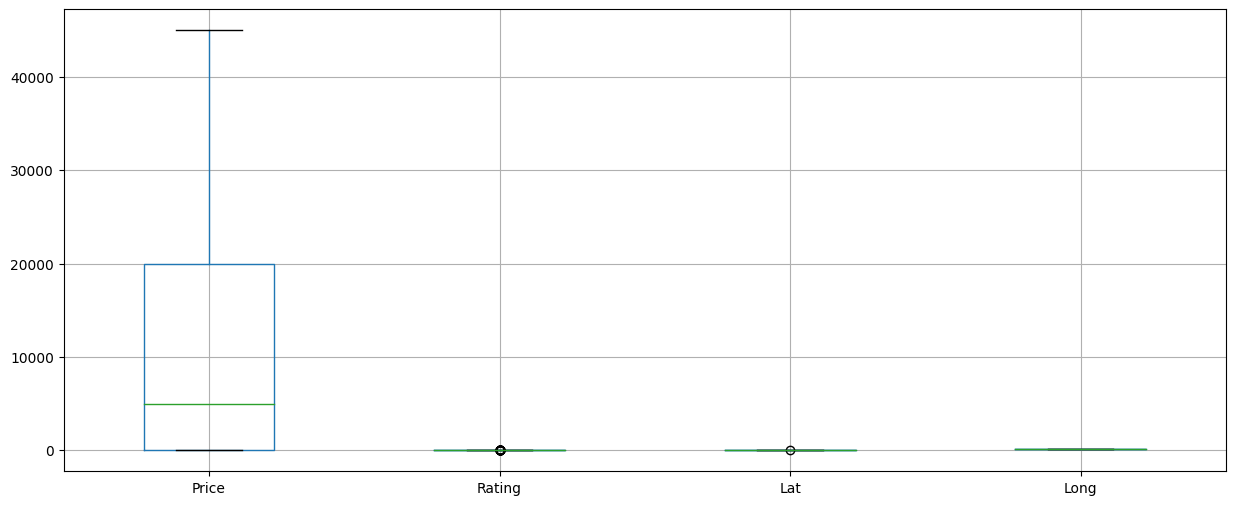

In [332]:
#deteksi outlier dengan boxplot
fig, ax = plt.subplots(figsize=(15, 6))
df.boxplot()
plt.show()

In [333]:
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [334]:
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])

SELEKSI FEATURE

In [335]:
# Menghapus kolom yang tidak diperlukan untuk proses analisis lebih lanjut
selected_df = df.drop(labels=['Coordinate', 'Lat', 'Long', 'Description'], axis=1)
selected_df

,Place_Name,Category,City,Price,Rating
0,Monumen Nasional,1,1,20000.000000,4.6
1,Kota Tua,1,1,0.000000,4.6
2,Dunia Fantasi,4,1,24652.173913,4.6
3,Taman Mini Indonesia Indah (TMII),4,1,10000.000000,4.5
4,Atlantis Water Adventure,4,1,24652.173913,4.5
...,...,...,...,...,...
432,Museum Mpu Tantular,1,3,2000.000000,4.4
433,Taman Bungkul,4,3,0.000000,4.6
434,Taman Air Mancur Menari Kenjeran,4,3,0.000000,4.4
435,Taman Flora Bratang Surabaya,4,3,0.000000,4.6


EDA

In [336]:
selected_df.describe()

,Category,City,Price,Rating
count,437.000000,437.000000,437.000000,437.000000
mean,2.286041,1.922197,9879.812954,4.448120
std,1.497126,1.608004,10660.382090,0.197714
min,0.000000,0.000000,0.000000,3.900000
25%,1.000000,0.000000,0.000000,4.400000
50%,2.000000,2.000000,5000.000000,4.500000
75%,4.000000,4.000000,20000.000000,4.600000
max,5.000000,4.000000,45000.000000,5.000000


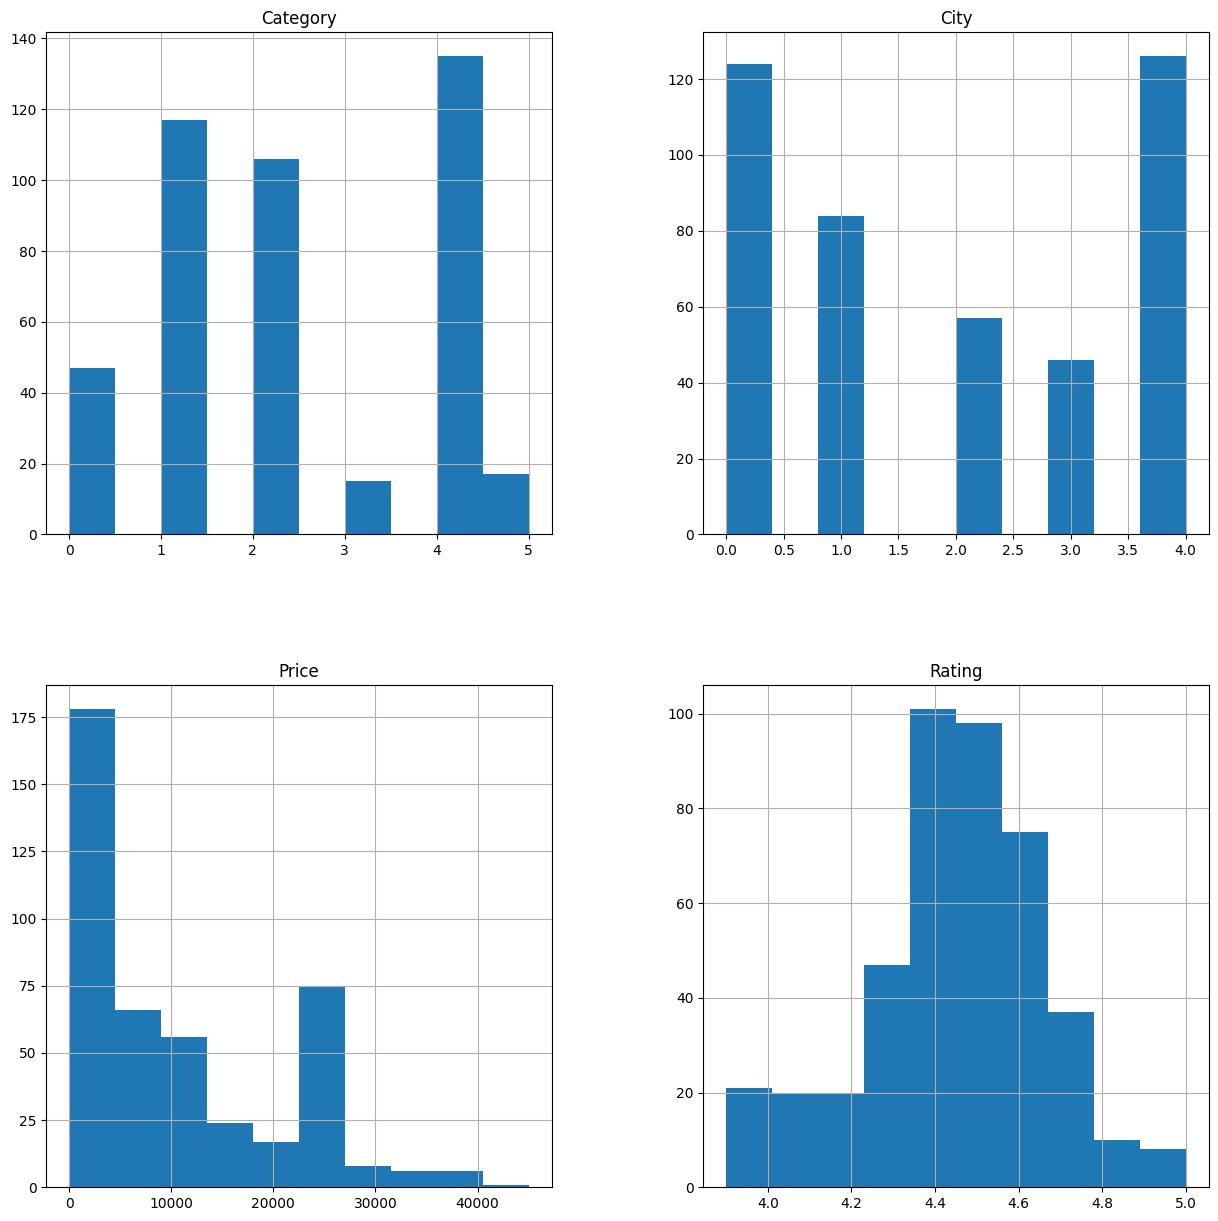

In [337]:
selected_df.hist(figsize=(15,15))
plt.show()

PEMODELAN DATA

In [338]:
x = selected_df[['Price', 'Rating']].values # Mengambil nilai-nilai dari kolom-kolom tersebut dalam bentuk array NumPy.
print(x)

[[2.00000000e+04 4.60000000e+00]
 [0.00000000e+00 4.60000000e+00]
 [2.46521739e+04 4.60000000e+00]
 [1.00000000e+04 4.50000000e+00]
 [2.46521739e+04 4.50000000e+00]
 [2.50000000e+04 4.50000000e+00]
 [4.00000000e+03 4.50000000e+00]
 [2.46521739e+04 4.00000000e+00]
 [2.46521739e+04 4.40000000e+00]
 [2.46521739e+04 4.50000000e+00]
 [5.00000000e+03 4.60000000e+00]
 [2.46521739e+04 4.00000000e+00]
 [5.00000000e+03 4.20000000e+00]
 [2.46521739e+04 4.80000000e+00]
 [0.00000000e+00 4.40000000e+00]
 [0.00000000e+00 4.30000000e+00]
 [5.00000000e+03 4.40000000e+00]
 [2.00000000e+03 4.70000000e+00]
 [2.46521739e+04 4.60000000e+00]
 [2.00000000e+03 4.50000000e+00]
 [5.00000000e+03 4.50000000e+00]
 [0.00000000e+00 4.70000000e+00]
 [0.00000000e+00 4.80000000e+00]
 [5.00000000e+03 4.60000000e+00]
 [0.00000000e+00 4.00000000e+00]
 [0.00000000e+00 4.30000000e+00]
 [2.46521739e+04 4.50000000e+00]
 [3.50000000e+04 4.50000000e+00]
 [0.00000000e+00 5.00000000e+00]
 [0.00000000e+00 4.50000000e+00]
 [2.500000

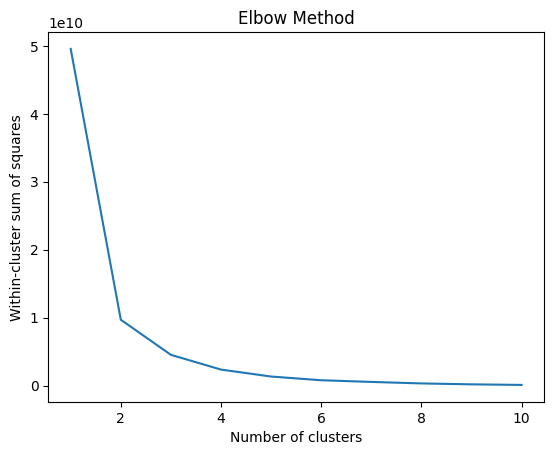

In [339]:
# elbow method (teknik untuk menentukan jumlah klaster yang optimal dalam k-means clustering)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

In [340]:
# Jumlah klaster yang diinginkan
k = 3

# Membuat objek KMeans dengan jumlah klaster yang diinginkan
kmeans = KMeans(n_clusters=k, init='k-means++')

# Melakukan klasterisasi terhadap data
kmeans.fit(x)

# Melakukan iterasi hingga konvergensi tercapai
while True:
    # Mendapatkan atribusi klaster saat ini
    current_labels = kmeans.labels_
    
    # Mendapatkan posisi centroid saat ini
    current_centers = kmeans.cluster_centers_
    
    # Menyimpan posisi centroid saat ini untuk memeriksa konvergensi
    previous_centers = current_centers.copy()
    
    # Memperbarui atribusi klaster berdasarkan posisi centroid saat ini
    kmeans.fit(x)
    
    # Mendapatkan atribusi klaster baru
    new_labels = kmeans.labels_
    
    # Memeriksa konvergensi dengan membandingkan posisi centroid sebelumnya dan saat ini
    if np.all(previous_centers == kmeans.cluster_centers_):
        break

# Mendapatkan posisi centroid akhir
final_centers = kmeans.cluster_centers_

# Menampilkan hasil klasterisasi
for i, data_point in enumerate(x):
    print("Data:", data_point, "Label Klaster:", new_labels[i])

print("Posisi Pusat Klaster:")
for i, center in enumerate(final_centers):
    print("Klaster", i+1, ":", center)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Data: [2.0e+04 4.6e+00] Label Klaster: 1
Data: [0.  4.6] Label Klaster: 0
Data: [2.46521739e+04 4.60000000e+00] Label Klaster: 1
Data: [1.0e+04 4.5e+00] Label Klaster: 2
Data: [2.46521739e+04 4.50000000e+00] Label Klaster: 1
Data: [2.5e+04 4.5e+00] Label Klaster: 1
Data: [4000.     4.5] Label Klaster: 0
Data: [2.46521739e+04 4.00000000e+00] Label Klaster: 1
Data: [2.46521739e+04 4.40000000e+00] Label Klaster: 1
Data: [2.46521739e+04 4.50000000e+00] Label Klaster: 1
Data: [5.0e+03 4.6e+00] Label Klaster: 0
Data: [2.46521739e+04 4.00000000e+00] Label Klaster: 1
Data: [5.0e+03 4.2e+00] Label Klaster: 0
Data: [2.46521739e+04 4.80000000e+00] Label Klaster: 1
Data: [0.  4.4] Label Klaster: 0
Data: [0.  4.3] Label Klaster: 0
Data: [5.0e+03 4.4e+00] Label Klaster: 0
Data: [2000.     4.7] Label Klaster: 0
Data: [2.46521739e+04 4.60000000e+00] Label Klaster: 1
Data: [2000.     4.5] Label Klaster: 0
Data: [5.0e+03 4.5e+00] Label Klaster: 0
Data: [0.  4.7] Label Klaster: 0
Data: [0.  4.8] Label Kl

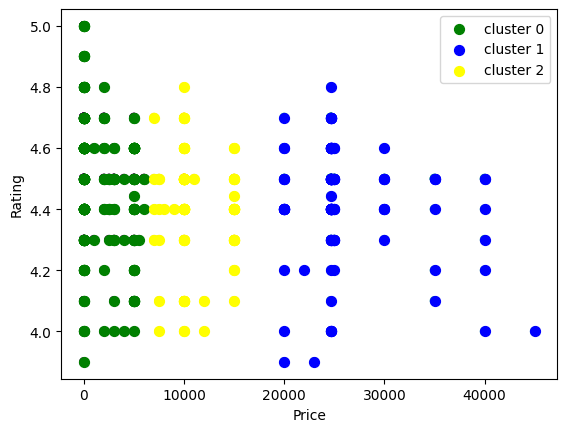

In [341]:
#melihat plot hasil
plt.scatter(x[:,0],x[:,1],c=kmeans.labels_,marker='o')
centroids = kmeans.cluster_centers_
labels = kmeans.labels_    
plt.scatter(x[labels ==0,0], x[labels == 0,1], s=50, color='green',label='cluster 0') 
plt.scatter(x[labels ==1,0], x[labels == 1,1], s=50, color='blue',label='cluster 1') 
plt.scatter(x[labels ==2,0], x[labels == 2,1], s=50, color='yellow',label='cluster 2') 
plt.legend()
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

In [342]:
selected_df['cluster'] = labels
selected_df['cluster'].value_counts()

0    233
1    113
2     91
Name: cluster, dtype: int64

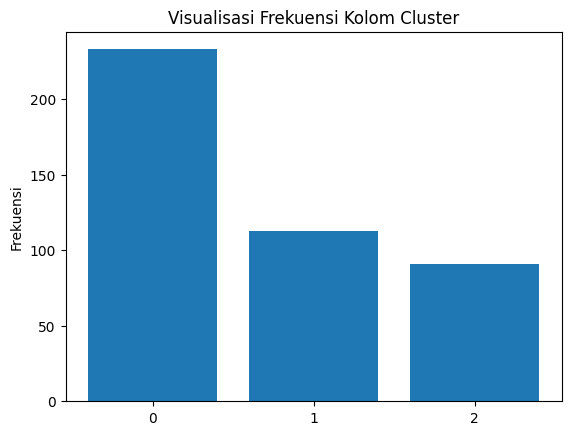

In [343]:
# Menghitung frekuensi masing-masing cluster
cluster_counts = selected_df['cluster'].value_counts()

# Menentukan posisi dan label untuk sumbu x
x_labels = cluster_counts.index
x_values = range(len(x_labels))

# Membuat plot bar
plt.bar(x_values, cluster_counts)

# Memberikan label pada sumbu x
plt.xticks(x_values, x_labels)

# Memberikan label pada sumbu y
plt.ylabel('Frekuensi')

# Memberikan judul pada plot
plt.title('Visualisasi Frekuensi Kolom Cluster')

# Menampilkan plot
plt.show()

In [344]:
# Mencetak nama-nama kabupaten di setiap klaster
for cluster in sorted(selected_df['cluster'].unique()):
    cluster_data = selected_df[selected_df['cluster'] == cluster]
    cluster_name = ""
    if cluster == 0:
        cluster_name = "Direkomendasikan"
    elif cluster == 1:
        cluster_name = "Tidak Direkomendasikan"
    elif cluster == 2:
        cluster_name = "Agak Direkomendasikan"
        
    print(f"Klaster {cluster} ({cluster_name}):")
    print(cluster_data['Place_Name'].tolist())
    print()

Klaster 0 (Direkomendasikan):
['Kota Tua', 'Kebun Binatang Ragunan', 'Pulau Bidadari', 'Pulau Pramuka', 'Pasar Seni', 'Jembatan Kota Intan', 'Museum Fatahillah', 'Museum Bank Indonesia', 'Museum Taman Prasasti', 'Museum Wayang', 'Masjid Istiqlal', 'Gereja Katedral', 'Museum Nasional', 'Pasar Tanah Abang', 'Pecinan Glodok', 'Wisata Kuliner Pecenongan', 'Taman Menteng', 'Setu Babakan', 'Taman Suropati', 'Pasar Taman Puring', 'Grand Indonesia Mall', 'Istana Negara Republik Indonesia', 'Galeri Nasional Indonesia', 'Museum Bahari Jakarta', 'Museum Seni Rupa dan Kramik', 'Monumen Selamat Datang', 'Taman Situ Lembang', 'Taman Ismail Marzuki', 'Galeri Indonesia Kaya', 'Museum Joang 45', 'Rumah Sipitung', 'Taman Agrowisata Cilangkap', 'Klenteng Jin De Yuan', 'Taman Lapangan Banteng', 'Taman Ayodya', 'Museum Sumpah Pemuda', 'Museum Tekstil', 'Tugu Proklamasi', 'Museum Kebangkitan Nasional', 'Museum Sasmita Loka Ahmad Yani', 'Museum Basoeki Abdullah', 'Pasar Petak Sembilan', 'Freedom Library', 'P

In [345]:
# Melakukan klasterisasi terhadap data
kmeans.fit(x)

# Mendapatkan atribusi klaster untuk setiap titik data
labels = kmeans.labels_

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(x, labels)

# Menampilkan hasil Silhouette Score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.71197233455675


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pada metode k-means, pemilihan centroid awal dilakukan secara acak. Proses ini tidak mempertimbangkan distribusi data atau jarak antara titik data. Pemilihan centroid yang buruk dapat menyebabkan hasil klasterisasi yang suboptimal, terutama jika centroid awal terkumpul di satu area data atau terletak sangat dekat satu sama lain. Sementara itu, metode k-means++ menggunakan pendekatan yang lebih cerdas dalam pemilihan centroid awal.

Perbedaan antara k-means dan k-means++ terlihat dalam inisialisasi objek KMeans. Dalam metode k-means, kita menggunakan init='random' atau tidak menyebutkan parameter init (defaultnya adalah 'random'), sedangkan dalam metode k-means++, kita menggunakan init='k-means++'.